In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [111]:
#other useful imports 
import numpy as np
import scipy as sp
import scipy.stats as stats
import h5py

from utils import featurewise_norm


### Principal Axes in Data

In [957]:
#generate some random gaussian data
rng = np.random.RandomState(seed=0)
num_points = 200
data_mean = np.array([4, 1])
data_cov = np.array([[2, .9], [.9, 2]])
toy_data = rng.multivariate_normal(mean=data_mean,
                                   cov=data_cov, size=200)

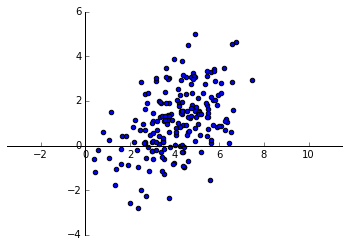

In [811]:
#let's look at the data
plt.scatter(toy_data[:, 0], toy_data[:, 1])
plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

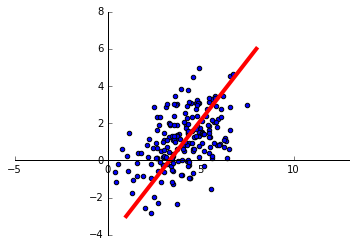

In [959]:
#here's the principle axis also plotted
plt.plot([1, 8], [-3, 6], color='r', linewidth=4)

plt.scatter(toy_data[:, 0], toy_data[:, 1])
plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

#we want to now center the data so that the principal axis is a vector
#that is -- is should go through the origin

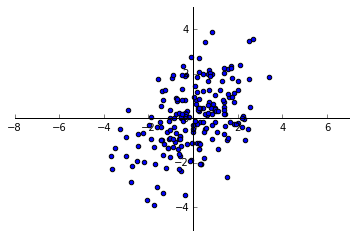

In [812]:
#ok this is the centering function
def center(x):
    return x - x.mean(0)

toy_data_ctr = center(toy_data)
plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])
plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

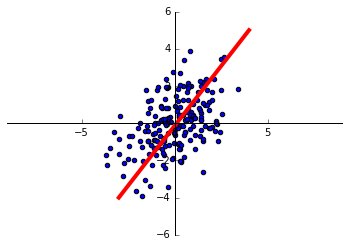

In [818]:
#now the principal axis goes through the origin 
#and is represented by a vector

plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])
plt.plot([1-mean[0], 8-mean[0]], [-3-mean[1], 6-mean[1]], color='r', linewidth=4)
plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

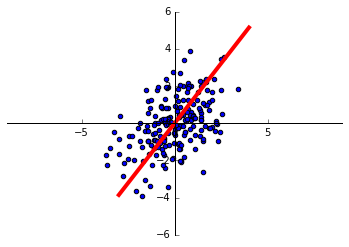

In [960]:
plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])

slope = 9. / 7.
line = lambda x: slope * x
plt.plot([-3, 4], [line(-3), line(4)], color='r', linewidth=4)

plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

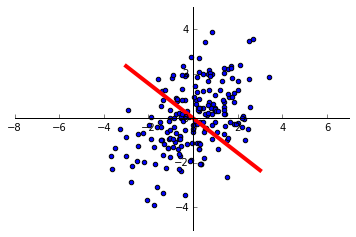

In [961]:
#let's have a look at the hyperplane orthogonal to the principal axis

plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])

orig_slope = 9./7.
slope = - 1. / orig_slope
line = lambda x: slope * x
plt.plot([-3, 3], [line(-3), line(3)], color='r', linewidth=4)

plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

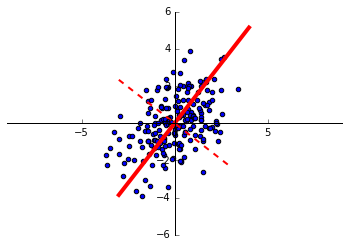

In [962]:
#let's look at the principal axis and the orthogonal hyperplane at the same time

plt.scatter(toy_data_ctr[:, 0], toy_data_ctr[:, 1])

slope = 9./7.
line = lambda x: slope * x
plt.plot([-3, 4], [line(-3), line(4)], color='r', linewidth=4)

line_perp = lambda x: -(1./slope) * x
plt.plot([-3, 3], [line_perp(-3), line_perp(3)], color='r', linewidth=2, linestyle='--')


plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

In [963]:
#here's a generic function that will plot a chosen axis
#as well as the hyperplane perpendicular to the chosen axis 
#as well as show some residuals from the perpendicular hyperplane 
#for various data points

def plot_axis(data, slope):
    line = lambda x: slope * x

    vec = np.array([1, line(1)])
    dx = np.dot(data, vec) / (np.linalg.norm(vec)**2)
    dy = vec[1] * dx
    xs = data[:, 0] - dx
    ys = data[:, 1] - dy

    plt.scatter(data[:, 0], data[:, 1])

    plt.plot([-3, 4], [line(-3), line(4)], color='r', linewidth=4)

    if slope:
        line_perp = lambda x: -(1./slope) * x 
        plt.plot([-3, 3], [line_perp(-3), line_perp(3)], color='r', linewidth=2, linestyle='--')
    else:
        plt.plot([0, 0], [-3, 3], color='r', linewidth=2, linestyle='--')
    
    for i in range(1, 41, 5):
        x0, y0 = data[i]
        x1 = xs[i]
        y1 = ys[i]
        plt.plot([x0, x1], [y0, y1], color='y', linewidth=3)

    plt.axis('equal')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

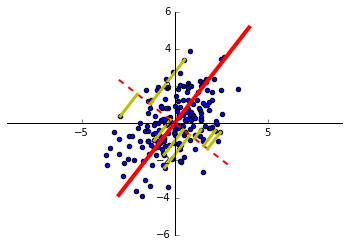

In [964]:
#This is with the slope picking out the correct principal axis
plot_axis(data=toy_data_ctr, slope=9./7.)

In [887]:
#now we care to understand how much variance is absorbed by 
#a given axis

def total_var(data, slope):
    line = lambda x: slope * x
    vec = np.array([1, line(1)])
    dx = np.dot(data, vec) / (np.linalg.norm(vec)**2)
    dy = vec[1] * dx
    diffs = np.sqrt((dx**2 + dy**2))
    return diffs.var()

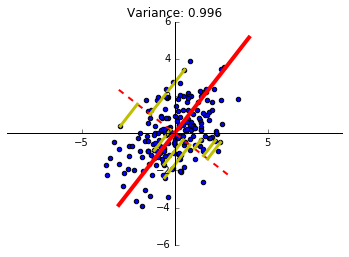

In [891]:
#The correct choice of principal axis absorbs the most variance
slope = 9./7.
plot_axis(toy_data_ctr, slope)
varval = total_var(toy_data_ctr, slope)
plt.title('Variance: %.3f' % varval)

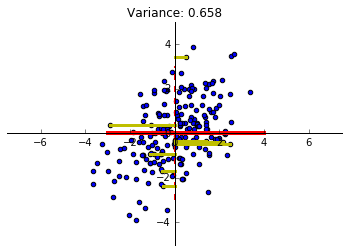

In [889]:
#... while the wrong choice absorbs less
slope = 0
plot_axis(toy_data_ctr, slope)
varval = total_var(toy_data_ctr, slope)
plt.title('Variance: %.3f' % varval)

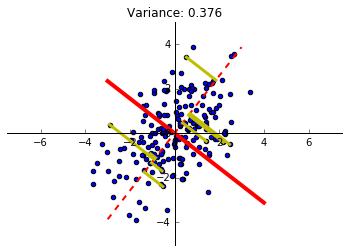

In [890]:
#... in fact picking the choice in the orthogonal hyperplane
#minimizes the absorbed variance

slope = - 1. / (9./7.)
plot_axis(toy_data_ctr, slope)
varval = total_var(toy_data_ctr, slope)
plt.title('Variance: %.3f' % varval)

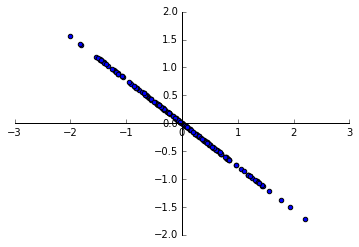

In [966]:
#Method of "deflation" removes all the variance
#along the principal axis and just leaves what's left

slope = 9/7.
line = lambda x: slope * x
vec = np.array([1, line(1)])
proj = np.dot(toy_data_ctr, vec) / (np.linalg.norm(vec)**2)
proj = toy_data_ctr - np.outer(proj, vec)
plt.scatter(proj[:, 0], proj[:, 1])

plt.axis('equal')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

### The Power Method

In [991]:
#ok let's load our usual data 
DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

In [992]:
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged'][:]
IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS']
V4_NEURONS = Ventral_Dataset['neural_meta']['V4_NEURONS']
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
IT_Neural_Data = Neural_Data[:, IT_NEURONS]

var_level = Ventral_Dataset['image_meta']['variation_level'][:]
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 

objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}


In [993]:
#use numpy recarray object to store metadata 
meta_array = np.core.records.fromarrays(Ventral_Dataset['image_meta'].values(),
                                        names=Ventral_Dataset['image_meta'].keys())

meta_array.dtype

dtype((numpy.record, [(u'category', 'S7'), (u'image_id', 'S40'), (u'object_name', 'S24'), (u'rotation_xy', '<f8'), (u'rotation_xz', '<f8'), (u'rotation_yz', '<f8'), (u'size', '<f8'), (u'translation_y', '<f8'), (u'translation_z', '<f8'), (u'variation_level', 'S2')]))

In [994]:
subset_inds = ((var_level == 'V6') & ((categories == 'Animals') | (categories == 'Boats'))).nonzero()[0]
Neural_Data_subset = IT_Neural_Data[subset_inds] 
Neural_Data_subset, _ig, _ig = featurewise_norm(Neural_Data_subset)

In [995]:
cov = np.dot(Neural_Data_subset.T, Neural_Data_subset)

In [996]:
#number of "feature dimensions" in the dataset
cov.shape

(168, 168)

In [705]:
def norm(v): return v / np.linalg.norm(v)

def power_method(A, n=200):
    #A = our matrix --- square of shape (k, k)
    #n = number of times we want to iterate the power method
    
    #initial guess for eigenvector
    k = A.shape[1]  #number of dimensions
    v = norm(np.random.rand(k))

    #iterate
    for i in range(n):
        #calculate v --> Av
        v = np.dot(A, v)
        #normalize
        v = norm(v)
        
    #compute corresponding eigenvalue
    l = np.dot(v.T, np.dot(A, v)) / np.dot(v, v)

    return l, v
    

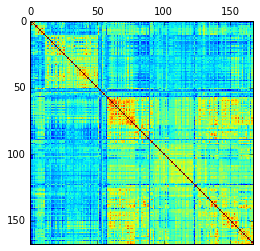

In [998]:
plt.matshow(cov)

In [999]:
l1, v1 = power_method(cov)

In [1000]:
l1

24130.609808875459

In [1001]:
test = np.dot(cov, v1)  / v1
test[:100]

array([ 24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  24130.60980888,  24130.60980888,  24130.60980888,
        24130.60980888,  

In [1002]:
#deflation of taking out the first eigenvector
cov1 = cov - l1 * np.outer(v1.T, v1)

In [1003]:
l2, v2 = power_method(cov1)

In [1004]:
l2

9291.9253253278948

In [1005]:
test = np.dot(cov, v2)  / v2
test[:10]

array([ 9291.92532533,  9291.92532533,  9291.92532533,  9291.92532533,
        9291.92532533,  9291.92532533,  9291.92532533,  9291.92532533,
        9291.92532533,  9291.92532533])

In [1006]:
#deflating again
cov2 = cov1 - l2 * np.outer(v2.T, v2)

In [1007]:
l3, v3 = power_method(cov2)

In [1008]:
l3

5626.2553387756743

In [1009]:
test = np.dot(cov, v3)  / v3
test[:10]

array([ 5626.25533878,  5626.25533878,  5626.25533878,  5626.25533878,
        5626.25533878,  5626.25533878,  5626.25533878,  5626.25533878,
        5626.25533878,  5626.25533878])

In [1010]:
def get_eigenvalues(A, n=200):
    #A is a square matrix 
    k = A.shape[1]
    vals = []
    vecs = []
    for i in range(k):
        l, v = power_method(A, n=n)   #power method
        vals.append(l); vecs.append(v) 
        A = A - l * np.outer(v.T, v)  #deflation
    return np.array(vals), np.array(vecs).T

In [1011]:
eigenvals, eigenvecs = get_eigenvalues(cov)

In [1013]:
eigenvecs.shape

(168, 168)

In [1014]:
eigenvals_from_numpy, eigenvecs_from_numpy = np.linalg.eig(cov)

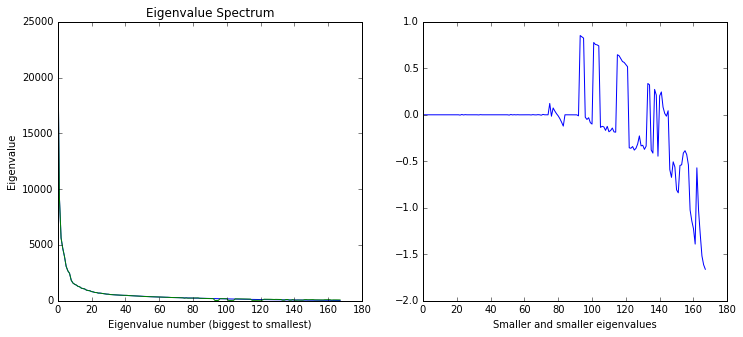

In [1016]:
plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.plot(eigenvals)
plt.plot(eigenvals_from_numpy)
plt.ylabel('Eigenvalue')
plt.xlabel('Eigenvalue number (biggest to smallest)')
plt.title('Eigenvalue Spectrum')
plt.subplot(122)
plt.plot((eigenvals - eigenvals_from_numpy) / eigenvals)
plt.xlabel('Smaller and smaller eigenvalues')

In [1018]:
eigenvecs[:, 1]

array([  1.79449706e-02,   2.27869460e-02,   5.21786537e-02,
         3.67072786e-02,   1.59831965e-02,   1.13220586e-02,
        -6.10218859e-02,   2.88831100e-04,  -4.70544114e-02,
        -6.61117817e-02,  -3.79711076e-02,   1.37966999e-01,
         1.35774491e-01,   1.31043513e-01,   1.28168171e-01,
         9.54285647e-02,   1.13258498e-01,   1.61107251e-01,
         1.20848841e-01,   1.38393066e-01,   1.54088243e-01,
         8.25081696e-02,   1.69474177e-01,   1.28176813e-01,
         1.44841045e-01,   1.81713994e-01,   9.09151394e-02,
         8.69563928e-02,   1.24929363e-01,   1.32372505e-01,
         9.94795880e-02,   1.25127768e-01,   7.62400796e-02,
         1.30800244e-01,   7.85048776e-02,   1.40899777e-01,
         1.06824771e-01,   1.24080369e-01,   1.53140780e-01,
         1.29385858e-01,   1.57876759e-01,   1.77575393e-01,
         1.78076914e-01,   1.60863780e-01,   1.28592470e-01,
         1.70245207e-01,   1.07002262e-01,   9.74536653e-02,
         1.73856420e-01,

(array([  5.,   3.,   7.,  11.,  26.,  21.,  24.,  38.,  21.,  12.]),
 array([-0.02224501, -0.0071376 ,  0.00796981,  0.02307722,  0.03818463,
         0.05329204,  0.06839945,  0.08350686,  0.09861427,  0.11372168,
         0.12882908]),
 <a list of 10 Patch objects>)

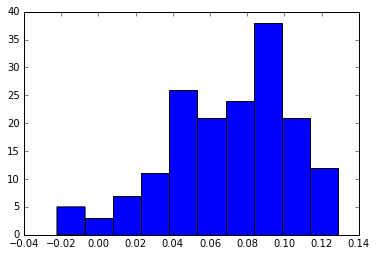

In [1019]:
#no one neuron is that important -- because the weightings
#of the neurons in the principal axis are pretty well distributed
plt.hist(eigenvecs[:, 0])

In [1021]:
#this is sorta  a measure of "interpretability"
stats.kurtosis(eigenvecs[:, 0])

-0.1850140538294487

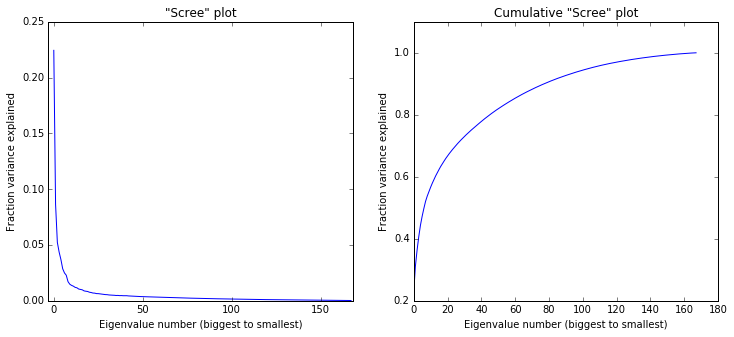

In [721]:
plt.figure(figsize = (12, 5))
plt.subplot(121)
normalized_eigenvals = eigenvals / np.sum(eigenvals)
plt.plot(normalized_eigenvals)
plt.xlim(-3, 168)
plt.ylabel('Fraction variance explained')
plt.xlabel('Eigenvalue number (biggest to smallest)')
plt.title('"Scree" plot')
plt.subplot(122)
plt.plot(normalized_eigenvals.cumsum())
plt.ylabel('Fraction variance explained')
plt.xlabel('Eigenvalue number (biggest to smallest)')
plt.title('Cumulative "Scree" plot')

In [722]:
Xproj = np.dot(Neural_Data_subset, eigenvecs)

(-30.0, 30.0, -15.0, 15.0)

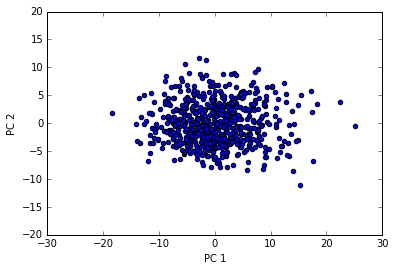

In [723]:
x = Xproj[:, 0]
y = Xproj[:, 1]

plt.scatter(x, y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')


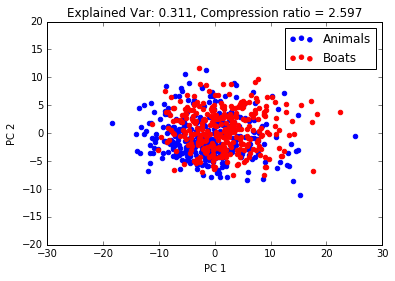

In [969]:
vl = 'V6'
cat1 = 'Animals'
cat2 = 'Boats'
subset_inds1 = ((var_level == vl) & (categories == cat1)).nonzero()[0]
subset_inds2 = ((var_level == vl) & (categories == cat2)).nonzero()[0]
subset_inds = np.concatenate([subset_inds1, subset_inds2])
Neural_Data_subset = IT_Neural_Data[subset_inds]  
category_subset = categories[subset_inds]

Neural_Data_subset, _ig, _ig = featurewise_norm(Neural_Data_subset)

cov = np.dot(Neural_Data_subset.T, Neural_Data_subset)

eigenvals, eigenvecs = get_eigenvalues(cov)

eigrat = eigenvals[0] / eigenvals[1]

expl_var = eigenvals[:2].sum() / eigenvals.sum()

Xproj = np.dot(Neural_Data_subset, eigenvecs)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.title("Explained Var: %.3f, Compression ratio = %.3f" % (expl_var, eigrat))


#### PCA as a visualization method

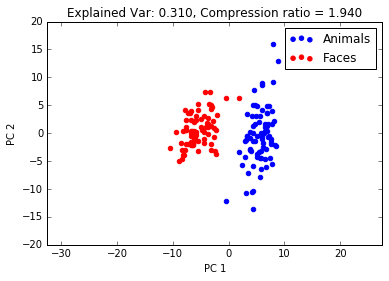

In [1022]:
vl = 'V0'
cat1 = 'Animals'
cat2 = 'Faces'
subset_inds1 = ((var_level == vl) & (categories == cat1)).nonzero()[0]
subset_inds2 = ((var_level == vl) & (categories == cat2)).nonzero()[0]
subset_inds = np.concatenate([subset_inds1, subset_inds2])
Neural_Data_subset = IT_Neural_Data[subset_inds]  
category_subset = categories[subset_inds]

Neural_Data_subset, _ig, _ig = featurewise_norm(Neural_Data_subset)

cov = np.dot(Neural_Data_subset.T, Neural_Data_subset)

eigenvals, eigenvecs = get_eigenvalues(cov)

eigrat = eigenvals[0] / eigenvals[1]

expl_var = eigenvals[:2].sum() / eigenvals.sum()

Xproj = np.dot(Neural_Data_subset, eigenvecs)

#projection of the data onto the two most important dimensions
x = Xproj[:, 0]  #projection onto the principal axis
y = Xproj[:, 1]  #projection onto the second principal axis

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.title("Explained Var: %.3f, Compression ratio = %.3f" % (expl_var, eigrat))


### In scikit form

In [972]:
class PCA(object):
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, train_data):
        data, self.fmean, self.fvar = featurewise_norm(train_data)
        cov = np.dot(data.T, data)
        eigenvals, eigenvecs = get_eigenvalues(cov)
        self.eigenvals = eigenvals
        self.eigenvecs = eigenvecs
        
    def transform(self, test_data):
        data, _ig, _ig = featurewise_norm(test_data, fmean=self.fmean, fvar=self.fvar)
        Xproj = np.dot(data, self.eigenvecs)
        return Xproj[:, :self.n_components]

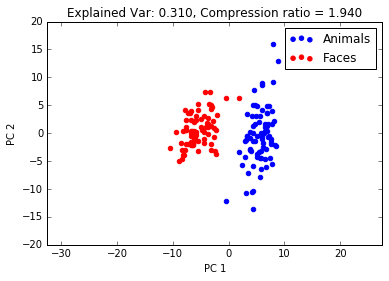

In [974]:
vl = 'V0'
cat1 = 'Animals'
cat2 = 'Faces'
subset_inds1 = ((var_level == vl) & (categories == cat1)).nonzero()[0]
subset_inds2 = ((var_level == vl) & (categories == cat2)).nonzero()[0]
subset_inds = np.concatenate([subset_inds1, subset_inds2])
Neural_Data_subset = IT_Neural_Data[subset_inds]  
category_subset = categories[subset_inds]

cls = PCA(n_components=2)
cls.fit(Neural_Data_subset)

Xproj = cls.transform(Neural_Data_subset)
eigrat = cls.eigenvals[0] / cls.eigenvals[1]
expl_var = cls.eigenvals[:2].sum() / cls.eigenvals.sum()

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.title("Explained Var: %.3f, Compression ratio = %.3f" % (expl_var, eigrat))


In [755]:
from sklearn.decomposition import PCA as sklearn_PCA

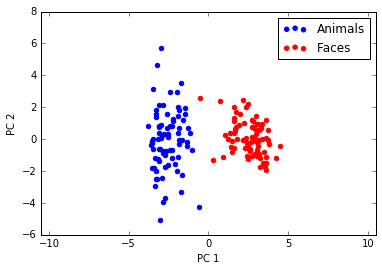

In [756]:
cls = sklearn_PCA(n_components=2)
cls.fit(Neural_Data_subset)

Xproj = cls.transform(Neural_Data_subset)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()


#### Whitening

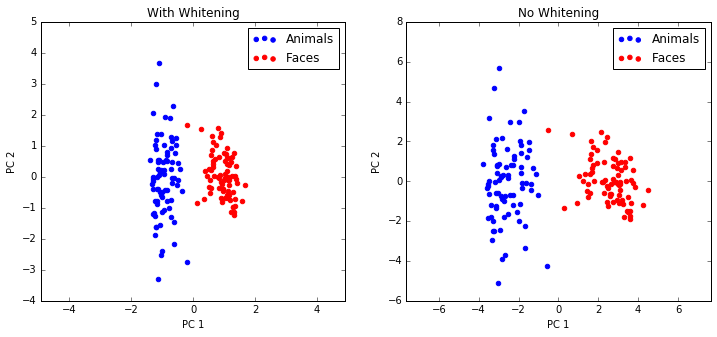

In [777]:
vl = 'V0'
cat1 = 'Animals'
cat2 = 'Faces'
subset_inds1 = ((var_level == vl) & (categories == cat1)).nonzero()[0]
subset_inds2 = ((var_level == vl) & (categories == cat2)).nonzero()[0]
subset_inds = np.concatenate([subset_inds1, subset_inds2])
Neural_Data_subset = IT_Neural_Data[subset_inds]  
category_subset = categories[subset_inds]

cls = sklearn_PCA(n_components=2, whiten=True)
cls.fit(Neural_Data_subset)

Xproj = cls.transform(Neural_Data_subset)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.title('With Whitening')


cls = sklearn_PCA(n_components=2, whiten=False)
cls.fit(Neural_Data_subset)

Xproj = cls.transform(Neural_Data_subset)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.subplot(1,2,2)
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.title('No Whitening')





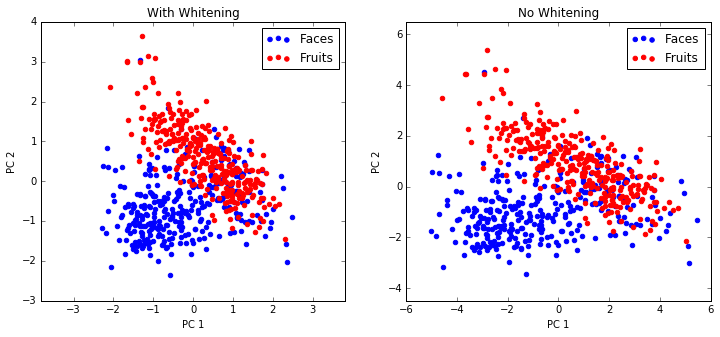

In [773]:
vl = 'V3'
cat1 = 'Faces'
cat2 = 'Fruits'
subset_inds1 = ((var_level == vl) & (categories == cat1)).nonzero()[0]
subset_inds2 = ((var_level == vl) & (categories == cat2)).nonzero()[0]
subset_inds = np.concatenate([subset_inds1, subset_inds2])
Neural_Data_subset = IT_Neural_Data[subset_inds]  
category_subset = categories[subset_inds]

cls = sklearn_PCA(n_components=2, whiten=True)
cls.fit(Neural_Data_subset)

Xproj = cls.transform(Neural_Data_subset)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.title('With Whitening')


cls = sklearn_PCA(n_components=2, whiten=False)
cls.fit(Neural_Data_subset)

Xproj = cls.transform(Neural_Data_subset)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.subplot(1,2,2)
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.title('No Whitening')





#### Incremental PCA

In [774]:
from sklearn.decomposition import IncrementalPCA

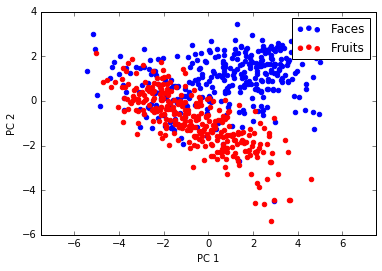

In [775]:
cls = IncrementalPCA(n_components=2)
cls.fit(Neural_Data_subset)

Xproj = cls.transform(Neural_Data_subset)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()


### Probabilistic Interpretation of PCA

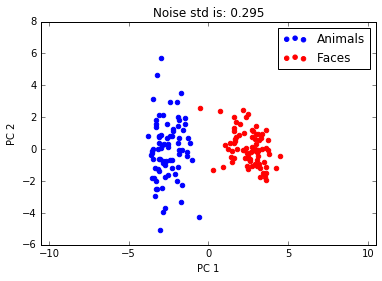

In [979]:
cls = sklearn_PCA(n_components=2)
cls.fit(Neural_Data_subset)

Xproj = cls.transform(Neural_Data_subset)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
std = (cls.noise_variance_)**(.5)
plt.title('Noise std is: %.3f' % std)

### Factor Analysis

In [980]:
from sklearn.decomposition import FactorAnalysis

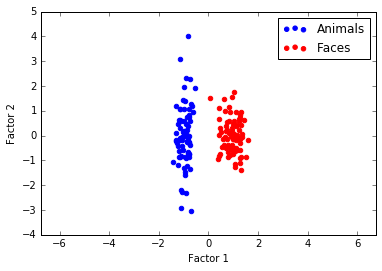

In [983]:
vl = 'V0'
cat1 = 'Animals'
cat2 = 'Faces'
subset_inds1 = ((var_level == vl) & (categories == cat1)).nonzero()[0]
subset_inds2 = ((var_level == vl) & (categories == cat2)).nonzero()[0]
subset_inds = np.concatenate([subset_inds1, subset_inds2])
Neural_Data_subset = IT_Neural_Data[subset_inds]  
category_subset = categories[subset_inds]

cls_fa = FactorAnalysis(n_components=2)
cls_fa.fit(Neural_Data_subset)

Xproj = cls_fa.transform(Neural_Data_subset)

x = Xproj[:, 0]
y = Xproj[:, 1]

xb = x[category_subset == cat1]
yb = y[category_subset == cat1]
xc = x[category_subset == cat2]
yc = y[category_subset == cat2]
plt.scatter(xb, yb, color='b', label=cat1)
plt.scatter(xc, yc, color='r', label=cat2)
plt.axis('equal')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend()


In [986]:
#See, now the noise variance is estimated separately for each dimension
cls_fa.noise_variance_.shape

(168,)

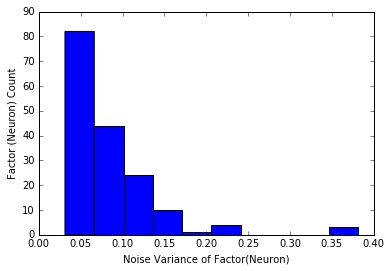

In [990]:
#Let's look at the noise estimate for each factor (here, factors=IT neurons)
plt.hist(cls_fa.noise_variance_)
plt.xlabel('Noise Variance of Factor(Neuron)')
plt.ylabel('Factor (Neuron) Count')

### Comparing PCA and Factor Analysis

Automatically created module for IPython interactive environment
best n_components by PCA CV = 10
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 10
best n_components by PCA CV = 40
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 38


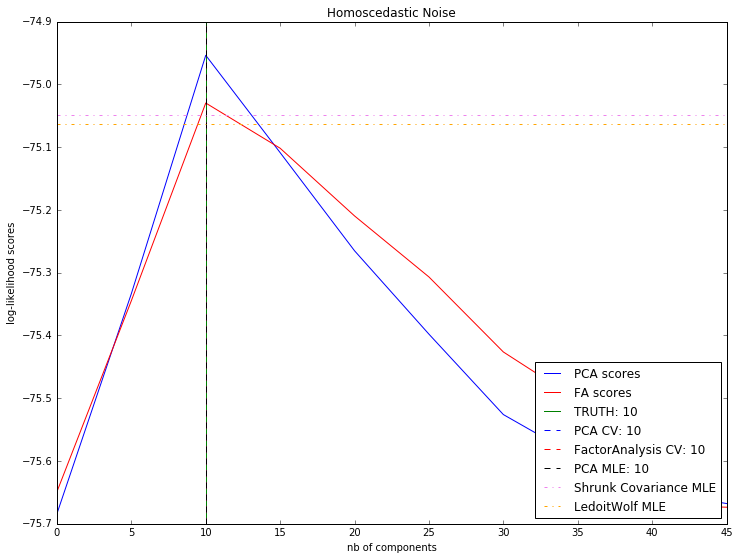

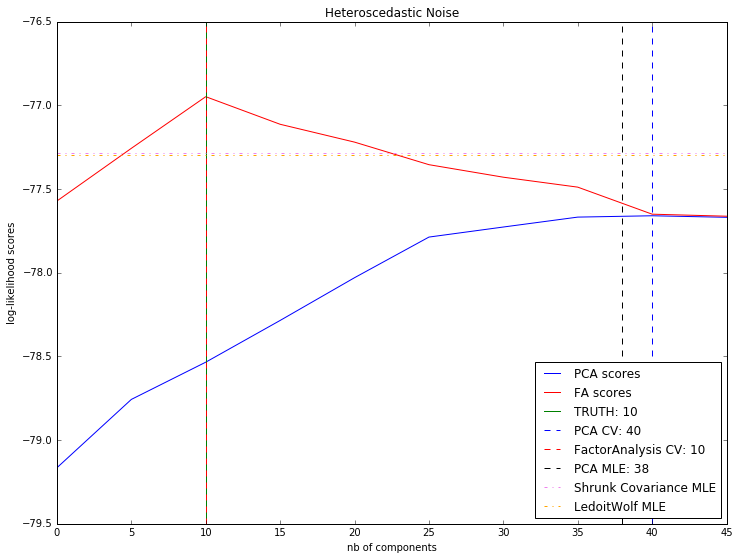

In [1028]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# #############################################################################
# Create the data

n_samples, n_features, rank = 1000, 50, 10
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_hetero = X + rng.randn(n_samples, n_features) * sigmas

# #############################################################################
# Fit the models

n_components = np.arange(0, n_features, 5)  # options for n_components


def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return pca_scores, fa_scores


def shrunk_cov_score(X):
    shrinkages = np.logspace(-2, 0, 30)
    cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': shrinkages})
    return np.mean(cross_val_score(cv.fit(X).best_estimator_, X))


def lw_score(X):
    return np.mean(cross_val_score(LedoitWolf(), X))


for X, title in [(X_homo, 'Homoscedastic Noise'),
                 (X_hetero, 'Heteroscedastic Noise')]:
    pca_scores, fa_scores = compute_scores(X)
    n_components_pca = n_components[np.argmax(pca_scores)]
    n_components_fa = n_components[np.argmax(fa_scores)]

    pca = PCA(svd_solver='full', n_components='mle')
    pca.fit(X)
    n_components_pca_mle = pca.n_components_

    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
    print("best n_components by PCA MLE = %d" % n_components_pca_mle)

    plt.figure(figsize=(12, 9))
    plt.plot(n_components, pca_scores, 'b', label='PCA scores')
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
    plt.axvline(n_components_pca, color='b',
                label='PCA CV: %d' % n_components_pca, linestyle='--')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')
    plt.axvline(n_components_pca_mle, color='k',
                label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

    # compare with other covariance estimators
    plt.axhline(shrunk_cov_score(X), color='violet',
                label='Shrunk Covariance MLE', linestyle='-.')
    plt.axhline(lw_score(X), color='orange',
                label='LedoitWolf MLE' % n_components_pca_mle, linestyle='-.')

    plt.xlabel('nb of components')
    plt.ylabel('log-likelihood scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

In [1030]:
pca.score?